In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv")

df.shape

(891, 12)

In [26]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Data cleaning
df = df.drop_duplicates() # Remove duplicates
df = df.dropna(subset=["Embarked"]) # Drop rows with missing values in Embarked

# Fill missing values in Age and Fare with the median
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [29]:
# check if data is cleaned or not
df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [30]:
# Data not completely clean but cabin in an unnecessary attribute so we'll remove it
# Feature engineering
# Remove unnecessary columns
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
# Encode categorical variables with one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


<Axes: >

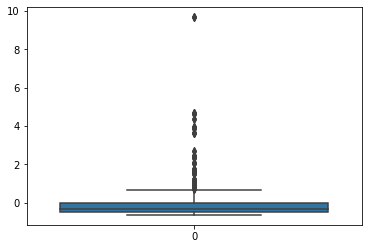

In [38]:
import seaborn as sns

sns.boxplot(df.Fare)

<Axes: >

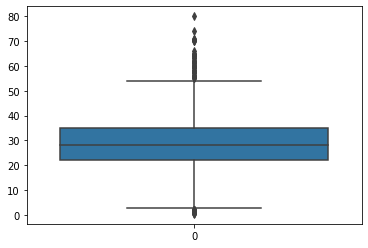

In [33]:
sns.boxplot(df.Age)

<Axes: >

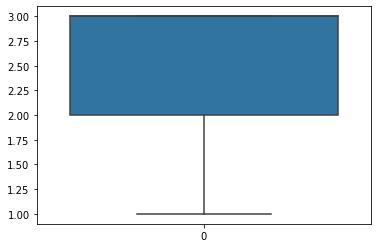

In [34]:
sns.boxplot(df.Pclass)

In [51]:
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Remove outliers from the column
df = df[(df["Fare"] >= lower_limit) & (df["Fare"] <= upper_limit)]

<Axes: >

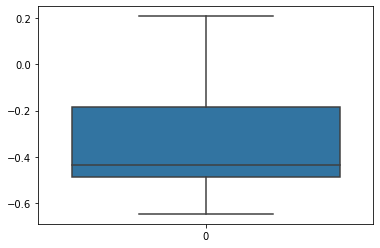

In [52]:

sns.boxplot(df.Fare)

In [36]:
# Normalize Age and Fare using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])


In [37]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.563674,1,0,-0.500240,True,False,True
1,1,1,0.669217,1,0,0.788947,False,False,False
2,1,3,-0.255451,0,0,-0.486650,False,False,True
3,1,1,0.438050,1,0,0.422861,False,False,True
4,0,3,0.438050,0,0,-0.484133,True,False,True
